# Applied ML

In [2]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Statistical test library
import scipy.stats as stats
import random

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, make_scorer


%matplotlib inline

np.random.seed(10)
random.seed(10)

# Data pre-processing

In [3]:
# Load the dataset
original = pd.read_csv("CrowdstormingDataJuly1st.csv", parse_dates=['birthday'], infer_datetime_format=True)

In [4]:
original.describe()

/Applications/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [5]:
# First glimpse at data content
original.ix[:5,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,1983-08-31,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,1982-01-08,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,1992-12-17,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,1993-08-31,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,1991-07-18,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-11-08,182.0,71.0,Center Back,1,0,0,1,0


In [6]:
original.ix[:5,13:]

,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


Challenges in dataset:

- Skin ratings don't match -> take average
- Picture was missing -> exclude from training
- No cards drawn in some dyads


Prune dataset where there is no rater information

In [7]:
# Helper function to see the efect when we drop rows
def dropping_stats(df):
    drop_perc =  100 * (original.shape[0] - df.shape[0]) / original.shape[0]
    print("%.2f%% of original data droped." % (drop_perc) )
    
    print("Now: %d rows" % df.shape[0] )

# Initial cleaning


In [8]:
# Drop columns that will not be relevant for our model
original['year'] = original['birthday'].apply(lambda x: x.year)

#nan-dropping
data = original.dropna(how='any', subset=['rater1', 'rater2', 'meanExp', 'meanIAT']) \
    .drop(['photoID', 'refCountry', 'Alpha_3', 'player', 'birthday'], axis=1)

In [9]:
# If a referee is present in less than 22 triads (rows), he cannot have
# refereed a match in these leages.
ref_grouped = data[['refNum', 'games']].groupby(['refNum']).sum()
ref_filtered = ref_grouped[ref_grouped['games'] >= 22].reset_index()

# Therefore, we filter the data on this condition
has_referee = data[data['refNum'].isin(ref_filtered['refNum'].values)]
cleaned = has_referee
dropping_stats(cleaned)


20.21% of original data droped.
Now: 116522 rows


In [10]:
cleaned = cleaned[cleaned['meanIAT'].notnull()]

### Dealing with nan-values


In [11]:
cleaned['weight'].isnull().value_counts()

False    115874
True        648
Name: weight, dtype: int64

In [12]:
cleaned['height'].isnull().value_counts()

False    116499
True         23
Name: height, dtype: int64

In [13]:
cleaned['leagueCountry'].isnull().value_counts()

False    116522
Name: leagueCountry, dtype: int64

We will fill these with the mean value

In [14]:
cleaned['weight'].fillna(cleaned['weight'].mean(), inplace=True)
cleaned['height'].fillna(cleaned['height'].mean(), inplace=True)

In [15]:
print(cleaned['height'].hasnans)
print(cleaned['weight'].hasnans)

False
False


## Making the class feature

To make the class of the skin color of each player, we take the mean of the value from the two raters. 
Players that does not have a rating gets dropped.

In [16]:
def get_binary_class(x):
    """ Returns 0 for players rated below 0.5 ('light-skinned') and 1 for players rated above ('dark-skinned')"""
    if x <= 0.5:
        return 0
    else:
        return 1

In [17]:
# Take the mean of the two raters value
mean_rating = has_referee[['rater1', 'rater2']].mean(axis=1)

# Drop the players that does not have a rating
mean_rating.dropna(inplace=True)

dropping_stats(mean_rating)

20.21% of original data droped.
Now: 116522 rows


In [18]:
# The players now have a rating between 0 and 1, real numbers
mean_rating.head()

5    0.125
6    0.125
7    1.000
8    0.250
9    0.000
dtype: float64

In [19]:
# Since we want to do a binary classification, we convert the real numbers to 0/1

binary_class = mean_rating.apply(get_binary_class)
binary_class.name = 'class'
binary_class.head()

5    0
6    0
7    1
8    0
9    0
Name: class, dtype: int64

In [20]:
# Keep only the data rows where we have the class

has_class = has_referee.ix[binary_class.index]
dropping_stats(has_class)

20.21% of original data droped.
Now: 116522 rows


In [21]:
counts = binary_class.value_counts()
counts

0    98033
1    18489
Name: class, dtype: int64

In [22]:
print("%.2f%% of the examples are light skinned" % (counts[0] / (counts[0] + counts[1]) * 100))

84.13% of the examples are light skinned


## Feature transformation

When we have categorical data, we need to transform them so that they can be taken into account in our model. We du this by using Panda's dummy-encoder, which transforms a feature into many one hot encoded features.

In [23]:
countries_encoded = pd.get_dummies(has_class['leagueCountry'])
countries_encoded.head()

,England,France,Germany,Spain
5,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0


In [24]:
position_encoded = pd.get_dummies(has_class['position'])
position_encoded.head()

,Attacking Midfielder,Center Back,Center Forward,Center Midfielder,Defensive Midfielder,Goalkeeper,Left Fullback,Left Midfielder,Left Winger,Right Fullback,Right Midfielder,Right Winger
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We remove the original categorical features, and attatch the new one_hot_encoded ones :

### Feature combinations

In [25]:
# Our hypothesis is that the combination of the referees 'discrimination score' and cards given,
# might help us classify the players. E.g., if a player got many cards from racist referees, 
# he is more likely dark-skinned.

red_exp = has_class['redCards'] * has_class['meanExp'] 
yellow_exp = has_class['yellowCards'] * has_class['meanExp']
yellow_red_exp = has_class['yellowReds'] * has_class['meanExp']

red_iat = has_class['redCards'] * has_class['meanIAT'] 
yellow_iat = has_class['yellowCards'] * has_class['meanIAT']
yellow_red_iat = has_class['yellowReds'] * has_class['meanIAT']

cards_iat = pd.concat([red_exp, yellow_exp, yellow_red_exp, red_iat, yellow_iat, yellow_red_iat], axis=1)
cards_iat.columns = ['red_exp', 'yellow_exp', 'red_yellow_exp', 'red_iat', 'yellow_iat', 'red_yellow_iat']
cards_iat.head(10)

,red_exp,yellow_exp,red_yellow_exp,red_iat,yellow_iat,red_yellow_iat
5,0.0,0.000000,0.0,0.0,0.000000,0.0
6,0.0,0.000000,0.0,0.0,0.000000,0.0
7,0.0,0.000000,0.0,0.0,0.000000,0.0
8,0.0,0.000000,0.0,0.0,0.000000,0.0
9,0.0,0.000000,0.0,0.0,0.000000,0.0
10,0.0,0.538462,0.0,0.0,0.325185,0.0
11,0.0,0.000000,0.0,0.0,0.000000,0.0
12,0.0,0.000000,0.0,0.0,0.000000,0.0
13,0.0,0.000000,0.0,0.0,0.000000,0.0
14,0.0,0.000000,0.0,0.0,0.000000,0.0


### Combining the features

In [26]:
columns_from_orig = ['playerShort', 'year', 'height', 'weight', 'games', 'victories','ties', 'defeats','goals','yellowCards',
                     'yellowReds','redCards','meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp']

colomns_one_hot_enoded = countries_encoded.columns | position_encoded.columns

features = has_class[columns_from_orig].join(countries_encoded).join(position_encoded).join(cards_iat).join(binary_class)
features.head()

,playerShort,year,height,weight,games,victories,ties,defeats,goals,yellowCards,...,Right Fullback,Right Midfielder,Right Winger,red_exp,yellow_exp,red_yellow_exp,red_iat,yellow_iat,red_yellow_iat,class
5,aaron-hughes,1979,182.0,71.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,aleksandar-kolarov,1985,187.0,80.0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,alexander-tettey,1986,180.0,68.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,anders-lindegaard,1984,193.0,80.0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,andreas-beck,1987,180.0,70.0,1,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [27]:
features.shape

(116522, 41)

### Aggregating over the players:

We now run grouping and aggregation of our dataframe. The aggregation functions used are defined in two dictionarys.
Each element of the dictionarys contains of a column name and an aggregation function, which is applied to our grouped features.

In [28]:
players = features.groupby(['playerShort','year','height', 'weight'])

# We sum over the one hot encoded features
one_hot_aggregation = {i: max for i in colomns_one_hot_enoded}

# And then sum over games, victories, ties, defeats, goals, cards, 
column_aggfunc_mapping = {'class': max, 'games': sum, 'victories': sum, 'ties': sum, 'defeats': sum, 'goals': sum,
                          'yellowCards': sum, 'yellowReds': sum, 'redCards': sum, 'red_exp': sum,
                          'yellow_exp': sum, 'red_yellow_exp': sum, 'red_iat': sum,
                          'yellow_iat': sum, 'red_yellow_iat': sum, 'meanIAT': np.mean, 'meanExp': np.mean}

# Union the aggregation function dicts
agg_funcs = {**one_hot_aggregation, **column_aggfunc_mapping}

agg_features = players.agg(agg_funcs)
agg_features = agg_features.reset_index().set_index('playerShort')
agg_features.head()

,year,height,weight,yellowCards,Left Winger,Left Fullback,goals,ties,defeats,meanIAT,...,victories,Germany,redCards,yellow_exp,red_yellow_iat,Right Midfielder,Center Back,France,Attacking Midfielder,Center Forward
playerShort,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,1979,182.0,71.0,19,0.0,0.0,8,179,224,0.345236,...,243,0.0,0,8.230927,0.000000,0.0,1.0,0.0,0.0,0.0
aaron-hunt,1986,183.0,73.0,42,0.0,0.0,62,72,122,0.348943,...,141,1.0,1,16.268793,0.000000,0.0,0.0,0.0,1.0,0.0
aaron-lennon,1987,165.0,63.0,11,0.0,0.0,31,97,115,0.345893,...,200,0.0,0,4.423886,0.000000,1.0,0.0,0.0,0.0,0.0
aaron-ramsey,1990,178.0,76.0,31,0.0,0.0,39,42,67,0.347013,...,144,0.0,1,13.311479,0.000000,0.0,0.0,0.0,0.0,0.0
abdelhamid-el-kaoutari,1990,180.0,73.0,8,0.0,0.0,1,40,43,0.331600,...,41,0.0,2,2.688808,1.356972,0.0,1.0,1.0,0.0,0.0


## Normalizing

In [30]:
from sklearn.preprocessing import normalize

X = normalize(agg_features, norm='l2')
X

array([[  9.31490175e-01,   8.56650894e-02,   3.34187986e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.75915974e-01,   8.99257921e-02,   3.58720373e-02, ...,
          0.00000000e+00,   4.91397771e-04,   0.00000000e+00],
       [  9.68075976e-01,   8.03887952e-02,   3.06939036e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  9.69763896e-01,   8.91849565e-02,   3.72420698e-02, ...,
          4.90027234e-04,   0.00000000e+00,   0.00000000e+00],
       [  9.94426209e-01,   9.27262342e-02,   4.21027225e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.90491233e-01,   9.27650400e-02,   3.89014684e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

## Machine Learning by RandomForestClassifier

We now split our dataframe into X (examples) and y (classes)

In [34]:
X = agg_features.drop('class', axis=1)
y = agg_features['class']

### Baseline model

To know what kind of results we can expect, we make a baseline model:

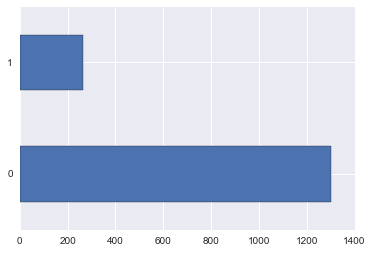

In [35]:
y.value_counts().plot(kind='barh', stacked=True)
plt.show()

In [36]:
print('There are about %.2f%% 0s in the class vector.' % (y.value_counts()[0] / y.shape[0]))

There are about 0.83% 0s in the class vector.


The result above shows that by allways predicting 0, we could achieve an accuracy of approximately 83%. 
We should therefore expect that our classifier performs at least as good as this, and hopefully significantly better. 

Let us try doing a k-fold cross validation with a dummy classifier that allways predicts the most frequent class:

In [37]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy_scores = cross_val_score(dummy, X, y, cv=10, n_jobs=-1)

print('Scores: %s\n\nAchieved model score: %.3f' % (dummy_scores, np.mean(dummy_scores)))

Scores: [ 0.82802548  0.82802548  0.82802548  0.83333333  0.83333333  0.83333333
  0.83333333  0.83333333  0.83333333  0.83333333]

Achieved model score: 0.832


As we can see, our dummy model achieves an accuracy score of 0.832 on average, which is what we expected.

### Ranfom forest

To avoid over- and underfitting in our random forest model, we want to find the best hyperparameters for the random forest model. This tuning is done by defining a range for each of the parameters we want to tune, and then evaluating the score by running a grid-search over all the permutations. 

In [39]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10, random_state=42) 

param_grid = {
    'max_features': ['log2','sqrt', None],
    'min_samples_leaf': [2,10,20],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'max_depth': [4,8,16,None],
}

#### Optimizing for accuracy

In [40]:
CV_rfc = GridSearchCV(estimator=rfc, scoring='accuracy', param_grid=param_grid, cv=10, verbose=True, n_jobs=-2)
CV_rfc.fit(X, y, )
print(CV_rfc.best_params_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   50.6s


{'max_depth': 16, 'class_weight': None, 'min_samples_leaf': 20, 'max_features': 'log2'}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.1min finished


### Training the model

We use the results found in the grid search to tune our random forrest classifier.

In [41]:
rfc = RandomForestClassifier(n_estimators=500, \
                             max_features='log2', \
                             max_depth=16, \
                             random_state=4, \
                             n_jobs=-2)
print(rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-2, oob_score=False, random_state=4,
            verbose=0, warm_start=False)


## Inspect most relevant features of RandomForest

Feature ranking:
1. feature 12 : meanExp  (0.096750)
2. feature 9 : meanIAT  (0.086770)
3. feature 25 : victories  (0.059081)
4. feature 24 : games  (0.054764)
5. feature 28 : yellow_exp  (0.052854)
6. feature 6 : goals  (0.052544)
7. feature 20 : yellow_iat  (0.051730)
8. feature 8 : defeats  (0.050741)
9. feature 2 : weight  (0.048224)
10. feature 7 : ties  (0.047223)
11. feature 1 : height  (0.043214)
12. feature 3 : yellowCards  (0.042130)
13. feature 0 : year  (0.040101)
14. feature 32 : France  (0.034796)
15. feature 18 : red_exp  (0.028256)
16. feature 15 : red_yellow_exp  (0.027574)
17. feature 19 : red_iat  (0.026197)
18. feature 29 : red_yellow_iat  (0.024538)
19. feature 26 : Germany  (0.018706)
20. feature 27 : redCards  (0.014408)
21. feature 23 : yellowReds  (0.013318)
22. feature 34 : Center Forward  (0.012239)
23. feature 17 : Spain  (0.010672)
24. feature 14 : England  (0.009105)
25. feature 11 : Goalkeeper  (0.006825)
26. feature 10 : Defensive Midfielder  (0.006678)


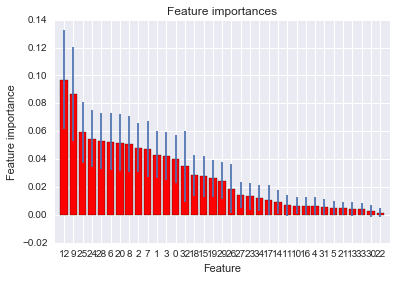

In [43]:
rfc.fit(X, y)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d : %s  (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.show()

## Performance assessment 

### Cross-validation

To see how our model performs, we run a k-fold cross validation, with k=10.

In [45]:
rfc_acc = cross_val_score(rfc, X, y, cv=10, scoring='accuracy', n_jobs=-1)
print(rfc_acc)
print('Achieved model score: ', np.mean(rfc_acc))

[ 0.82802548  0.85350318  0.82802548  0.82692308  0.84615385  0.83333333
  0.83974359  0.85897436  0.8525641   0.83333333]
Achieved model score:  0.840057978115


In [46]:
# Use dummy classifier for reference
dummy_acc = cross_val_score(dummy, X, y, cv=10, scoring='accuracy', n_jobs=-1)

Visualize score results as boxplots

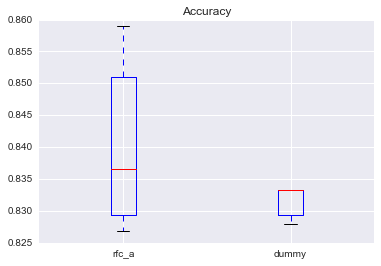

In [48]:
plt.title('Accuracy')
plt.boxplot([rfc_acc,dummy_acc], labels=['rfc_a', 'dummy'], )
plt.show()

As we can see, our model is only slightly better than the dummy classifier (on average)

### Confusion matrix

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1250, 35) (313, 35) (1250,) (313,)


In [50]:
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.99      0.94       274
          1       0.67      0.15      0.25        39

avg / total       0.86      0.88      0.85       313



Visualize confusion matrix

/Applications/anaconda/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Confusion matrix, without normalization
[[1297    3]
 [  34  229]]


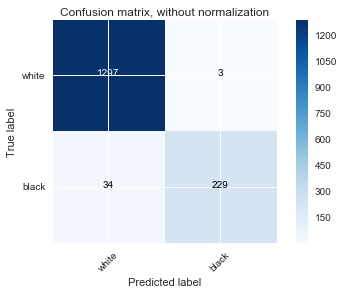

In [51]:
from plot_helpers import custom_confusion_matrix
from sklearn.metrics import confusion_matrix

y_true = y
y_pred = rfc.predict(X)

cm = confusion_matrix(y_true, y_pred)

custom_confusion_matrix(cm, classes=['white','black'], title='Confusion matrix, without normalization')

## Statistical significance of result

Here we test the distribution of the achieved learning score against the learning score value achieved by a simple DummyClassifier to see if our model actually performs significantly better.

In [ ]:
from scipy.stats import ttest_1samp
dummy_ratio = 0.83
t,p_value = ttest_1samp(scores, dummy_ratio, axis=0)
p_value

Since the p-value is below 0.05 we don't reject the null hypothesis which is the assumption that the mean of the random sample consisting of the results of our crossvalidation is equal to true mean, consisting of the dummy classifier ratio. This concludes that our models performance is not significantly better than the datasets random level class ratio.

# Bonus: Learning curve


In [ ]:
#train_sizes = np.arange(300,1201, int((1201-300)/20))
train_sizes = np.arange(0.1, 1.0, 0.8/3)
train_sizes.shape

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
     rfc, X, y, train_sizes=train_sizes, cv=10, n_jobs=-1)

In [ ]:
plt.figure()
plt.title("Learning curve")

plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, '-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, '-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

### Club skin-color rate

In [ ]:
# TODO: is this cheating?
club_class = pd.concat([has_class['club'], binary_class], axis=1)
club_class_mean = club_class.groupby('club').mean()
club_class_mean.columns = ['club_class_mean']
club_class_mean.head()

In [ ]:
club_stats = pd.DataFrame(has_class['club']).merge(club_class_mean, left_on='club', right_index=True, how='left')
club_stats.head()

In [ ]:
plt.savefig("Learning_curve")

# Applied ML

In [ ]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import plot_helpers

# Statistical test library
import scipy.stats as stats

%matplotlib inline

# Data pre-processing

In [ ]:
# Load the dataset
original = pd.read_csv("CrowdstormingDataJuly1st.csv", parse_dates=['birthday'], infer_datetime_format=True)

In [ ]:
original.describe()

In [ ]:
from pandas.tools.plotting import scatter_matrix

#scatter_matrix(original, figsize=(30, 30), diagonal='histogram')

In [ ]:
# First glimpse at data content
original.ix[:10,:13]

Challenges in dataset:

- Skin ratings don't match -> take average
- Picture was missing -> exclude from training
- No cards drawn in some dyads


Prune dataset where there is no rater information

# Initial cleaning


In [ ]:
grouped = original[['refNum', 'games']].groupby(['refNum']).sum()
grouped_df = grouped[grouped['games'] >= 22].reset_index()

In [ ]:
referees_df = original[original['refNum'].isin(grouped_df['refNum'].values)]

In [ ]:
# Function to round on quater ratings
def round_quarter(x):
    return round(x*4)/4

def binary_class(x):
    return round(x*2)/2

In [ ]:
rater = referees_df.copy()
#rater['rater_mean'] = round_quarter(rater[['rater1','rater2']].mean(axis=1))
rater['rater_mean'] = binary_class(rater[['rater1','rater2']].mean(axis=1))
rater['rater_mean'].head()

In [ ]:
rater = rater.dropna(subset=['rater_mean'])
rater['rater_mean'].head()

Get rid of unusable columns

In [ ]:
# rater.columns[:16] | rater.columns[20:] - ['Alpha_3']

In [ ]:
rater.columns


In [ ]:
features = rater

# Take only the features that describes the player
# Feature 1 contains the short name of the player
# Feature 16 and upwards contains the information about the rater

#TODO: add referee columns
features = features.reset_index(drop=True)
# features = rater[ rater.columns[:16] | ['rater_mean']]
features.head()

In [ ]:
features.shape

Convert string values to floats by LabelEncoder to make them readable by the classifier

In [ ]:
features['refNum'].unique().shape

In [ ]:
original_features = features.copy()

In [ ]:
# Split birthday into year...
# features_t = features[features['birthday'].str.split('-')]
# features_t

In [ ]:


# Workaround by removing problematic columns
#features = features.drop('position', axis=1)
#features = features.drop('Alpha_3', axis=1)
#features.head()


## Feature transformation

When we have categorical data, we need to transform them so that they can be taken into account in our model. One way of doing this is to use LabelEncoder and OneHotEncoder from SciKitLearn. 

LabelEncoder converts each category into an integer, so that we don't have to deal with strings. After doing this transformation, we use OneHotEncoder to make a binary feature for each category. This way, we can capture for instance wether a person has played for both Fulham FC and Manchester City. 

In [ ]:
# We select those features that contains some categorical value
# At the same time, we fill the NaN-values by '' to avoid problems later on
categorical_features = features[['leagueCountry','position','club']].fillna('Missing')


columns = []
for cat in categorical_features.columns:
    counts = categorical_features[cat].value_counts()
    n_cats = len(counts)
    
    columns += list(counts.keys().values)

    print("%s (%i categories):" % (cat.capitalize(), n_cats))
    print("%s\n" % counts[:10])

In [ ]:
# Our categorical_features now looks like this:
categorical_features.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Step 1: Transform each category into an integer
## For this, we use LabelEncoder from sklearn

label_encoded = categorical_features.apply(LabelEncoder().fit_transform)
label_encoded.head()

In [ ]:
# Step 2: Transform each integer into a binary feature
## For this, we use OneHotEncoder

one_hot_encoded = OneHotEncoder().fit_transform(label_encoded).toarray()

one_hot_encoded_features = pd.DataFrame(one_hot_encoded, columns=columns)

one_hot_encoded_features



We remove the original categorical features, and attatch the new one_hot_encoded ones :

In [ ]:
features_no_categorical = features.drop( categorical_features.columns, axis=1)
features_no_categorical.shape


In [ ]:
features_one_hot_encoded = features_no_categorical.join(one_hot_encoded_features)
features_one_hot_encoded

### Feature combinations

In [ ]:
cards = features_one_hot_encoded[['redCards', 'yellowCards', 'yellowReds']]

iat = pd.DataFrame(cards.sum(axis=1) * features_one_hot_encoded['meanIAT'], columns=['IAT_comb'])
features_one_hot_encoded.join(iat, rsuffix="IAT_comb")

In [ ]:
meanIAT = features_one_hot_encoded['meanIAT']
combIAT = pd.DataFrame(cards.sum(axis=1) * meanIAT, columns=['combIAT'])

features_with_gen = features_one_hot_encoded.join(combIAT)

### Aggregating over the players:

We now run grouping and aggregation of our dataframe. The aggregation functions used are defined in two dictionarys.
Each element of the dictionarys contains of a column name and an aggregation function, which is applied to our grouped features.

In [ ]:
grouped_features = features_with_gen.groupby(['playerShort', 'birthday', 'height', 'weight'])

# Aggregating with max gives us a logical OR on the one hot encoded features
one_hot_enc_aggfunc_mapping = {i: max for i in one_hot_encoded_features.columns}
column_aggfunc_mapping = {'rater_mean': max,'games': sum, 'victories': sum, 'ties': sum, 'defeats': sum, 'goals': sum, 'yellowCards': sum, 'yellowReds': sum, 'redCards': sum, 'meanIAT': np.mean, 'nIAT': np.mean, 'meanExp': np.mean, 'nExp': np.mean, 'combIAT': sum}

aggregated_features = grouped_features.agg({**one_hot_enc_aggfunc_mapping, **column_aggfunc_mapping})
aggregated_features = aggregated_features.reset_index().set_index('playerShort')
aggregated_features.head()

Prepared dataset for further processing with ML methods

In [ ]:
from sklearn import preprocessing


X_lab = aggregated_features.apply(LabelEncoder().fit_transform)

Xy = X_lab

In [ ]:
X_train = Xy.drop(['rater_mean'], axis=1)
Y_train = Xy['rater_mean']
#Y_train = np.asarray(rater['rater_mean'], dtype="|S6")
X_train = X_train.tail(-3)
Y_train = Y_train[3:]
print(type(Y_train))
print(X_train.shape)
print(Y_train.shape)
print('FEATURES')
print(X_train.head(10))
print('LABELS')
print(Y_train)

## Normalizing

In [ ]:

X_train = preprocessing.normalize(X_train, norm='l2')
X_train

## Machine Learning by RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(verbose=1, min_samples_split=2, oob_score=True)
print(rfc)

### Test classifier

In [ ]:
# import test data set to test classifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

In [ ]:
rfc.fit(X, y)

In [ ]:
# test prediction
X_pred = [[3, 5, 4, 2], [5, 4, 3, 2]]
rfc.predict(X_pred)

### Use classifier with live data

In [ ]:
# Plug of unplug live data
X = X_train
y = Y_train

In [ ]:
rfc.fit(X, y)

In [ ]:
# manual prediction test
#X_pred = features.head(3)
#rfc.predict(X_pred)

## Inspect most relevant features of RandomForest

In [ ]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Performance assessment through cross-validation

In [ ]:
from sklearn.cross_validation import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(rfc, X, y, cv=50, scoring='accuracy')
print(scores)
print('Achieved model score: ', np.mean(scores))

Visualize score results as boxplots

In [ ]:
plt.boxplot(scores)

## Exercise 2


For the aggregation the referee information grouping by soccer player we use original features only, since it was not specified in the homework description whether or not we should use our base features alongside engineered ones.

Moreover using base features for clustering is a little easier to comprehend and explain.

### Aggregate the referee information grouping by soccer player

In [ ]:
#Group by soccer player
grouped_features = original_features.groupby(['playerShort', 'birthday', 'height', 'weight'])
grouped_features.first()

#Aggregate referee information
column_aggfunc_mapping = {'rater_mean': max,'games': sum, 'victories': sum, 'ties': sum, \
                          'defeats': sum, 'goals': sum, 'yellowCards': sum, 'yellowReds': sum, \
                          'redCards': sum, 'meanIAT': np.mean, 'nIAT': np.mean, 'meanExp': np.mean, \
                          'nExp': np.mean}

aggregated_features = grouped_features.agg( column_aggfunc_mapping ) \
                            .reset_index() \
                            .set_index('playerShort')

#Convert birthday date column to seperate year, month and day columns
aggregated_features['year'] = aggregated_features['birthday'].dt.year
aggregated_features['month'] = aggregated_features['birthday'].dt.month
aggregated_features['day'] = aggregated_features['birthday'].dt.day

aggregated_features = aggregated_features.drop(['birthday'], axis=1)
aggregated_features.head()

Since we want to have only two disjoint clusters lets use kMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

Y_true = aggregated_features['rater_mean'].round().as_matrix() #We want binary classification / two distinct clusters
X = aggregated_features.drop(['rater_mean'], axis=1)
X = X.apply(LabelEncoder().fit_transform)
X_scaled = preprocessing.scale(X, axis=1)
X_copy = X.copy()

kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
Y_pred = kmeans.labels_

For binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

Our baseline KMeans clustering with 2 clusters and all features:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score

conf_mat = confusion_matrix(Y_true, Y_pred)
silhouette = silhouette_score(X_scaled, Y_pred)

plot_helpers.custom_confusion_matrix(conf_mat, classes=['White skin', 'Black skin'],
                      title='Confusion matrix')

plt.show()
print("Silhouette score: ", silhouette)
print("Accuracy: ", (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0]))
print("F1 score: ", f1_score(Y_true, Y_pred))

Let's try to drop features in order which seems to be the most resonable - where we believe two disjoint clusters are easy to find. 

In [ ]:
X = X_copy
#Drop all features below = leave 'defeats' feature
to_drop = ['day', 'month', 'year', 'height', 'weight', 'goals', 'games', 'ties', 'victories', 'nIAT', 'nExp', 'meanExp', 'yellowReds', 'yellowCards', 'redCards']
silhouettes = []
for drop_column in to_drop:
    
    X = X.drop([drop_column], axis=1)
    X_scaled =  preprocessing.scale(X, axis=1)

    kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
    Y_pred = kmeans.labels_

    conf_mat = confusion_matrix(Y_true, Y_pred)
    silhouette = silhouette_score(X_scaled, Y_pred)
    silhouettes.append(silhouette)
    
plt.title('Silhouette score after each feature drop')
silhouettes_plt = sns.barplot(x=to_drop, y=silhouettes, palette="Greens_d")
plt.setp(silhouettes_plt.get_xticklabels(), rotation=45)
plt.show()

plot_helpers.custom_confusion_matrix(conf_mat, classes=['White skin', 'Black skin'],
                      title='Confusion matrix')

plt.show()
print("Accuracy: ", (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0]))
print("F1 score: ", f1_score(Y_true, Y_pred))

As we can see creating two distinct clusters with high silhouette score is not a problem if distincitve feature is selected and quite suprisingly it achieves high accuracy. However this is simply due to the fact that majority of the players are white. Moreover it is worth noting that F1 measure/score is very low which means that although two distinct clusters where achieved, they are not race based (whites and blacks are mixed in both clusters, not blacks in one and whites in other). 

In order to check if two distinct clusters for which players with dark and light skin colors belong to different clusters can be achieved, we brute forced calculations to find what is the best feature dropping order for which Silhouette score and F1 score is highest:
```
n_iters = 100
best_silhouette = 0.0
best_f1 = 0.0
best_drop_order = []
to_drop_list = []
Y_pred_best
for i in range(n_iters):
 
    to_drop = ['day', 'month', 'year', 'height', 'weight', 'goals', 'games','nIAT', 'nExp', 'meanExp','ties', 'yellowReds', 'yellowCards', 'redCards','defeats', 'victories',]
    np.random.shuffle(to_drop)
    to_drop = to_drop[:-1]
    X = X_copy
    
    print("Iteration: ", i)
    to_drop_list.append(to_drop)

    for drop_column in to_drop:
        X = X.drop([drop_column], axis=1)
        X_scaled =  preprocessing.scale(X, axis=1)
        kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
        Y_pred = kmeans.labels_

        conf_mat = confusion_matrix(Y_true, Y_pred)
        accuracy = (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0])
        silhouette = silhouette_score(X_scaled, Y_pred)
        f1 = f1_score(Y_true, Y_pred)

        
        if ((silhouette > best_silhouette) and (f1 > best_f1)):
            best_silhouette = silhouette
            best_drop_order = to_drop
            best_f1 = f1
            
            print("Silhouette score: ", silhouette)
            print("Accuracy: ", accuracy)
            print("f1: ", f1)

```
in order to find out that:

In [ ]:
best_drop_order = ['victories',
 'goals',
 'defeats',
 'redCards',
 'day',
 'month',
 'meanExp',
 'year',
 'yellowCards',
 'ties',
 'yellowReds',
 'height',
 'nExp',
 'nIAT',
 'weight']

Which means only one feature is left out:

In [ ]:
to_drop = ['day', 'month','height', 'weight', 'goals','nIAT', 'nExp', 'meanExp','ties', 'yellowReds', 'yellowCards', 'defeats', 'year', 'games', 'victories', 'redCards']
left_feature = list(set(to_drop) - set(best_drop_order))
left_feature

Let's re-cluster for this best drop order and print some metrics.

In [ ]:
X = X_copy
silhouettes = []
for drop_column in best_drop_order:
    X = X.drop([drop_column], axis=1)
    X_scaled =  preprocessing.scale(X, axis=1)
    kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
    Y_pred = kmeans.labels_

    conf_mat = confusion_matrix(Y_true, Y_pred)
    silhouette = silhouette_score(X_scaled, Y_pred)
    silhouettes.append(silhouette)
    
plt.title('Silhouette score after each feature drop')
silhouettes_plt = sns.barplot(x=best_drop_order, y=silhouettes, palette="Greens_d")
plt.setp(silhouettes_plt.get_xticklabels(), rotation=45)
plt.show()

plot_helpers.custom_confusion_matrix(conf_mat, classes=['White skin', 'Black skin'],
                      title='Confusion matrix')

plt.show()
print("Accuracy: ", (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0]))
print("F1 score: ", f1_score(Y_true, Y_pred))

Low F1 score speaks for itself.
This result upholds our previous thoughts and assumptions - there is no way of creating two distinct clusters where players with dark and light skin colors belong to different clusters. We can easily clusterize players such that silhouette score is high but this result is not skin color dependent. 

Ufff...! We are glad that when it comes to sports racism is not a thing! :)